In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data =[]
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x): # y 값이 sin 곡선 아래에 있으면
            correct_data.append([0,1]) # 타겟을 규정
        else:
            correct_data.append([1,0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2

wd_width = 0.01
eta = 0.1
epoch = 101
interval = 10

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wd_width * np.random.randn(n_upper, n) #가중치(행렬)
        self.b = wd_width * np.random.randn(n) #편향 (벡터)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) #시그모이드
    
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

        

In [11]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wd_width * np.random.randn(n_upper, n)
        #n_upper - 가중치의 row수 입력의 column수                                                                     #
        self.b = wd_width * np.random.randn(n)
        # wb_width = 0.01 가중치와 편향 설정을 위한 정규분포의 표준편차
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/ np.sum(np.exp(u), axis=1, \
                                  keepdims=True) 
        # 배치사이즈 X 1 형태의 행렬을 유지하기 위해 keepdims=True를 사용
            
            
    def backward(self, t):
        delta = self.y - t #델타는 y-t 이다
        self.grad_w = np.dot(self.x.T, delta) #가중치에대한 기울기
        self.grad_b = np.sum(delta, axis=0) # bias에 대한 기울기
        self.grad_x = np.dot(delta, self.w.T) 
            
    def update(self, eta):
        self.w -= eta * self.grad_w #기존의 w에서 빼줘서  값을 갱신해준다
        self.b -= eta * self.grad_b

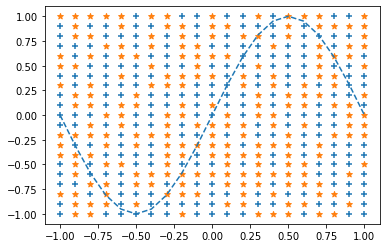

Epoch:0/101 Error:-0.7269513006746954


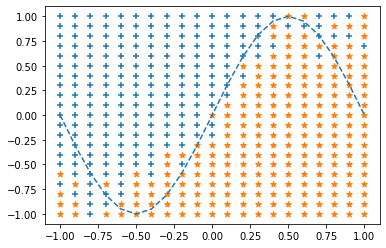

Epoch:10/101 Error:-0.3092811883485998


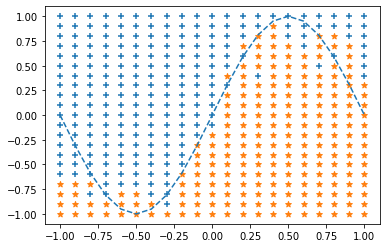

Epoch:20/101 Error:-0.21843790355435244


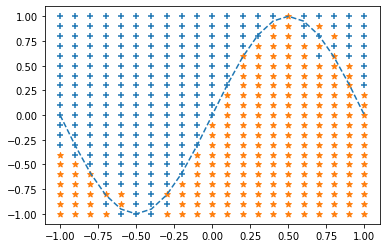

Epoch:30/101 Error:-0.1645605370708813


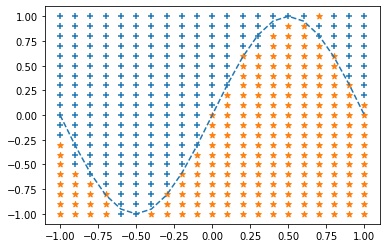

Epoch:40/101 Error:-0.11992488026798316


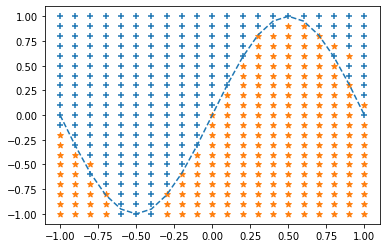

Epoch:50/101 Error:-0.09448663821842469


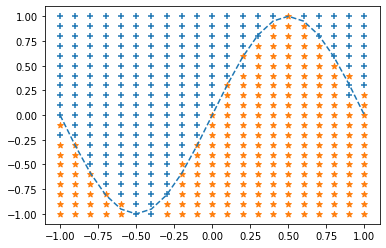

Epoch:60/101 Error:-0.08330549682954012


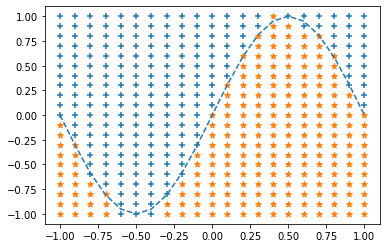

Epoch:70/101 Error:-0.0803930984851131


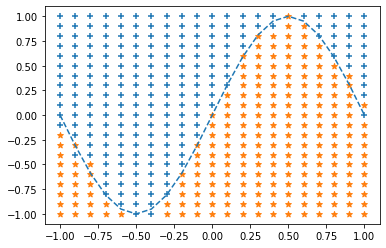

Epoch:80/101 Error:-0.07342758660292335


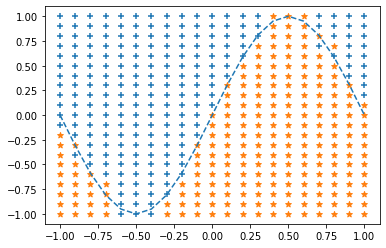

Epoch:90/101 Error:-0.07762407003792673


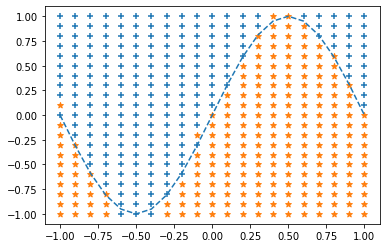

Epoch:100/101 Error:-0.0674717613712943


In [13]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

sin_data = np.sin(np.pi * X)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x) 
        
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            total_error += np.sum(t * np.log(y + 1e-7))
            
            if y[0] > y[1]: # 위가 크면
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i % interval == 0:
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker='+')
        plt.scatter(x_2, y_2, marker='x')
        plt.show()
    
        print("Epoch:"+str(i)+'/'+str(epoch), \
         "Error:"+str(total_error/n_data))